# Problem Set 1 (20 + 40 + 30 = 90 points)

## Important information
1.  We provide signatures of the functions that you have to implement. Make sure you follow the signatures defined, otherwise your coding solutions will not be graded.

2.  Please submit the single Jupyter Notebook file, where only Python and Markdown/$\LaTeX$ are used. Any hand-written solutions inserted by photos or in any other way **are prohibitive and will not be graded**. If you will have any questions about using Markdown, ask them!
3.  The works will be checked for **plagiarism**. The score will be divided by the number of similar works.

4. Some tasks in this assignment are bonus. It means that you can get maximum score for this assignment even if you ignore these tasks. However, if you get $y$ points for bonus tasks and $x$ points for regular tasks, then your score for the assignment will be $\min(90, x+y)$. If $x + y > 90$, then we will label your submission and take into account in the final grade releasing (e.g. in the border case).

## Problem 1. QR backpropagation (20 pts)

Our goal is to write an orthogonalization layer, that for an arbitrary rectangular matrix $A$ produces an orthonormal matrix $Q$ and (optionally) an upper triangualr matrix $R$ such that $A = QR$. 
In other words, we need to compute the QR decomposition.

There are problems when one need to optimize over orthogonal matrices, so using such layer can be a solution.

A standard algorithm to compute the QR decomposition is the Gram-Schmidt process.
For the linearly independent set of vectors $a_1,\dots,a_n$ (that are defined with the matrix $A$) it computes matrix $Q$ that contains orthonormalized set of vectors $q_1,\dots,q_n$.

This algorithm is listed below.

$$
\begin{split}
u_1 &= v_1, \\
u_2 &= v_2 - \frac{(v_2, u_1)}{(u_1, u_1)} u_1, \\
\dots \\
u_n &= v_n - \frac{(v_n, u_1)}{(u_1, u_1)} u_1 - \frac{(v_n, u_2)}{(u_2, u_2)} u_2 - \dots - \frac{(v_n, u_{n-1})}{(u_{n-1}, u_{n-1})} u_{n-1}.
\end{split}
$$

Obtained $u_1, \dots, u_n$ are orthogonal vectors in exact arithmetics. Then to make the system orthonormal you should divide each of the vectors by its norm: $u_i := u_i/\|u_i\|$.

We have $A = QR$. 
Matrix $Q$ consists of vectors $u_1, \dots, u_n$. 
Now let's look at the matrix $R$. 

$Q^*A = R$. 
So $R_{i, j} = (u_i, v_j)$ (assuming $u_i$ is already normalized). 
And it is exactly what we see in Gram-Schmidt algorithm:

$$ v_n = \frac{(v_n, u_1)}{(u_1, u_1)} u_1 + \frac{(v_n, u_2)}{(u_2, u_2)} u_2 + \dots + \frac{(v_n, u_{n-1})}{(u_{n-1}, u_{n-1})} u_{n-1} + u_n.$$ 

This is the representation of vectors $v_i$ in our newly computed ortonormal basis. 
Thus they form matrix $R$. 
These coefficients are in the upper triangular part of $R$, because when $i>j$ we get $R_{i j} = 0$, because then we get sum of scalar products of orthogonal vectors. 

There is a more [computationally stable version of the Gram-Schmidt algorithm](https://en.wikipedia.org/wiki/Gram–Schmidt_process#Numerical_stability) that reduces the loss of orthogonality in matrix $Q$. 
This algorithm is called the modified Gram-Schmidt algorithm.

The loop of orthogonalization is the same, except for the computing the vector $u_k$ simultaneously:

$$ u_n = v_n - \frac{(v_n, u_1)}{(u_1, u_1)} u_1 - \frac{(v_n, u_2)}{(u_2, u_2)} u_2 - \dots - \frac{(v_n, u_{n-1})}{(u_{n-1}, u_{n-1})} u_{n-1}
u_n$$

$$ 
 = v_n - \frac{(v_n, u_1)}{(u_1, u_1)} u_1 - \frac{(v_n, u_2)}{(u_2, u_2)} u_2 - \dots - \frac{(v_n, u_{n-1})}{(u_{n-1}, u_{n-1})} u_{n-1},
$$

one need to iteratively update $u_k$ step-by-step for a better numerical stability.

$$
\begin{split}
u_k &= v_k - \frac{(v_k, u_1)}{(u_1, u_1)} u_1, \\
u_k &= u_k - \frac{(u_k, u_2)}{(u_2, u_2)} u_2, \\
\dots \\
u_k &= u_k - \frac{(u_k, u_{k-1})}{(u_{k-1}, u_{k-1})} u_{k-1}. \\
\end{split}
$$


You are supposed to do the following tasks:

__1.__ (2 points) Implement the modified Gram-Schmidt algorithm in a function ```modified_gram_schmidt(A)``` using PyTorch.

__2.__ (1 point) Create a random matrix $A \in \mathbb{R}^{m \times n}$, $m \gg n$. For the arbitrary loss function, eg. $L(Q) = \sum_{i=0}^{m-1}\sum_{j=0}^{n-1} q_{ij}$, compute the gradient $\frac{\partial L}{\partial Q}$. Finally, compute $\frac{\partial L}{\partial A}$ using built-in PyTorch backpropagation through your implementation of QR decomposition (```modified_gram_schmidt(A)```).

__3.__ (2 points) Compute gradient $\frac{\partial L}{\partial A}$ using backpropagation through built-in PyTorch function for computing QR decomposition.

In [ ]:
import torch
import numpy as np

In [ ]:
def modified_gram_schmidt(A):
    """
    Computes QR decomposition of matrix A
    
    Input: 
        A - m x n matrix
    Output:
        Q - m x n orthonormal matrix
        R - n x n upper triangular matrix
    """
    
    # Your code here 
    #1. Implement the modified Gram-Schmidt algorithm in a function
    m, n = A.shape
    A_copy = A.clone()
    Q = torch.zeros((m, n), requires_grad=True).clone()
    R = torch.zeros((n, n), requires_grad=True).clone()

    for j in range(n):
        v = A_copy[:, j]
        for i in range(j):
            R[i, j] = torch.dot(Q[:, i], v)
            v -= R[i, j] * Q[:, i]
        R[j, j] = torch.norm(v, p=2)
        Q[:, j] = v / R[j, j]
    return Q, R

m = 100
n = 20
A = torch.rand(m, n)
A.requires_grad = True

# Your code is below
#2. Compute gradient dL/dA using built-in PyTorch backpropagation through modified_gram_schmidt
with torch.autograd.graph.allow_mutation_on_saved_tensors():
  Q2, R2 = modified_gram_schmidt(A) # modified_gram_schmidt
  loss2 = Q2.sum()
  loss2.backward()
dL2_dA = A.grad
print("dL/dA using modified Gram-Schmidt algorithm:\n", dL2_dA)
A.grad.zero_()

#3. Compute gradient dL/dA using backpropagation through built-in PyTorch function for computing QR decomposition.
Q1, R1 = torch.linalg.qr(A) # torch version
loss1 = Q1.sum()
loss1.backward()
dL1_dA = A.grad
print("dL/dA using built-in PyTorch function:\n", dL1_dA)

dL/dA using modified Gram-Schmidt algorithm:
 tensor([[ 0.3820,  0.0954,  0.1269,  ..., -0.0573, -0.0642, -0.0751],
        [-0.3160, -0.0544, -0.1111,  ...,  0.0067,  0.0016,  0.0049],
        [-0.3253, -0.0785, -0.1033,  ..., -0.0038, -0.0152, -0.0101],
        ...,
        [ 0.0340,  0.0283,  0.0900,  ...,  0.0023,  0.0123,  0.0121],
        [-0.3447, -0.0750, -0.0985,  ...,  0.0608,  0.0704,  0.0849],
        [ 0.0245,  0.0188,  0.0418,  ..., -0.0438, -0.0742, -0.0781]])
dL/dA using built-in PyTorch function:
 tensor([[ 0.1304,  0.1866, -0.1042,  ..., -0.0470,  0.0809, -0.0751],
        [-0.0164, -0.0551, -0.0547,  ...,  0.0089,  0.0101,  0.0049],
        [ 0.0928, -0.1249,  0.1816,  ...,  0.0183,  0.0496, -0.0101],
        ...,
        [-0.1762, -0.1175,  0.0304,  ...,  0.0173, -0.0244,  0.0121],
        [ 0.0890, -0.0786,  0.0703,  ...,  0.0770, -0.0787,  0.0849],
        [-0.1709, -0.1685,  0.0250,  ..., -0.0549,  0.1278, -0.0781]])


__4.__ (13 points total) Write the backpropagation $\frac{\partial L}{\partial A}$ from scratch with PyTorch. Do not forget to use ```requires_grad=False``` to disable PyTorch autograd accumulation of the gradient.

  a) (2 points) Derive analytically the gradient $\frac{\partial y}{\partial x}$ of vector normalization operation $y := x/\|x\|$.

  b) (1 point) Implement backward through the vector normalization operation (can be implemented either in the function ```backward_normalization``` or further inside the code).

  c) (2 points) Derive analytically the gradient $\frac{\partial u_k}{\partial v_j}$ of the othonormalization operation:

$$
\begin{split}
u_k &= v_k - \frac{(v_k, u_1)}{(u_1, u_1)} u_1, \\
u_k &= u_k - \frac{(u_k, u_2)}{(u_2, u_2)} u_2, \\
\dots \\
u_k &= u_k - \frac{(u_k, u_{k-1})}{(u_{k-1}, u_{k-1})} u_{k-1}. \\
\end{split}
$$

  d) (2 points) Implement backward through the othonormalization operation (can be implemented either in the function ```backward_orthogonalization``` or further inside the code).

  e) (1 point) Implement the QR forward pass (almost identically to ```modified_gram_schmidt```, but with storing the additional data nesessary for backpropagation) with the method ```forward``` of class ```QR``` (see template below).

  f) (5 points) Implement the QR backward pass using previously implemented functions and place it in the method ```backward``` of class ```QR```  (see template below).

### Your solution
$\frac{\partial y}{\partial x} = \frac{1}{\|x\|} \bigg(I_n - \frac{xx^T}{\|x\|^2}\bigg)$

$\frac{\partial u_k}{\partial v_j} = \begin{cases}
D_{11}= I_n  &\text{if}\  k = 1\\
D_{kk} = D_{k-1,k-1} - \frac{u_{k-1}u_{k-1}^T}{u_{k-1}^Tu_{k-1}} &\text{if}\ k > 1 \\
\sum_{i=1}^{k-1}D_{ki}\frac{\partial u_i}{\partial v_j} &\text{if}\ k > j \\
\end{cases}$

where $D_{ki} = -\frac{\partial}{\partial u_k}\bigg(\frac{(v_k,u_i)}{(u_i,u_i)}u_i \bigg) = - \bigg( \frac{u_iv_k^T}{u_i^Tu_i} - \frac{2u_iv_k^T}{u_i^Tu_i} u_iu_i^T + \frac{u_i^Tv_k}{u_i^Tu_i}I_n \bigg) ;\ k > i$ \\
$I_n$ is the $n \times n$ identity matrix; $n$ - dimension

__4.__ a) Let $x$ be an input vector of size $n$, and let $y$ be the normalized output vector of size $n$. Then, we have:

$$y_i = \frac{x_i}{\|x\|}$$

where $\|x\|$ is the Euclidean norm of $x$, given by:

$$\|x\| = \sqrt{x_1^2 + x_2^2 + \dots + x_n^2}$$

In order to find the gradient of $y$ with respect to $x$, we can proceed by first finding the derivative of the Euclidean norm $\|x\|$ with respect to $x$, and then using the chain rule.

The derivative of the Euclidean norm with respect to $x_j$ is:

$$\frac{\partial \|x\|}{\partial x_j} = \frac{\partial}{\partial x_j} \left(\sqrt{x_1^2 + x_2^2 + \dots + x_n^2}\right) = \frac{x_j}{\|x\|}$$

Next, we can apply the chain rule to find the derivative of $y_i$ with respect to $x_j$:

$$\frac{\partial y_i}{\partial x_j} = \frac{\partial}{\partial x_j} \left(\frac{x_i}{\|x\|}\right) = \frac{1}{\|x\|} \frac{\partial x_i}{\partial x_j} - \frac{x_i}{(\|x\|)^2} \frac{\partial \|x\|}{\partial x_j}$$

Since $\frac{\partial x_i}{\partial x_j}$ is equal to 1 only when $i=j$ and 0 otherwise, we can simplify the above equation as follows:

$$\frac{\partial y_i}{\partial x_j} = \begin{cases} \frac{1}{\|x\|} - \frac{x_i x_j}{(\|x\|)^3}\ \ \ \ \text{if}\ i=j \\ -\frac{x_i x_j}{(\|x\|)^3}\ \ \ \ \ \ \ \ \ \ \ \text{otherwise} \end{cases}$$

This gives us the gradient of $y$ with respect to $x$ as a Jacobian matrix:

$$J = \begin{bmatrix} \frac{\partial y_1}{\partial x_1} & \frac{\partial y_1}{\partial x_2} & \dots & \frac{\partial y_1}{\partial x_n} \\ \frac{\partial y_2}{\partial x_1} & \frac{\partial y_2}{\partial x_2} & \dots & \frac{\partial y_2}{\partial x_n} \\ \vdots & \vdots & \ddots & \vdots \\ \frac{\partial y_n}{\partial x_1} & \frac{\partial y_n}{\partial x_2} & \dots & \frac{\partial y_n}{\partial x_n} \end{bmatrix} = \frac{1}{\|x\|} \bigg(I_n - \frac{xx^T}{\|x\|^2}\bigg)$$

where $I_n$ is the $n \times n$ identity matrix and $x^T$ is the transpose of $x$. 
Hence,
$$\frac{\partial y}{\partial x} = \frac{1}{\|x\|} \bigg(I_n - \frac{xx^T}{\|x\|^2}\bigg)$$

c) Let $u_1, u_2, \dots, u_n$ be an orthonormal basis obtained from the Gram-Schmidt process applied to the linearly independent set of vectors $v_1, v_2, \dots, v_n$. We assume that $u_1, u_2, \dots, u_{k-1}$ have already been computed by the algorithm, and we wish to derive the expression for $\frac{\partial u_k}{\partial v_j}$, for $j \in \{1, 2, \dots, n\}$.

We can write $u_k$ as a sum of two terms:

$$u_k = v_k - \frac{(v_k, u_1)}{(u_1, u_1)} u_1 - \frac{(v_k, u_2)}{(u_2, u_2)} u_2 - \dots - \frac{(v_k, u_{k-1})}{(u_{k-1}, u_{k-1})} u_{k-1} = v_k - \sum_{i=1}^{k-1}\frac{(v_k, u_{i-1})}{(u_{i-1}, u_{i-1})}u_{i-1}$$

Taking the derivative with respect to $v_j$, we obtain:

$$\frac{\partial u_k}{\partial v_j} = \begin{cases}
D_{11}= I_n  &\text{if}\  k = 1\\
D_{kk} = D_{k-1,k-1} - \frac{u_{k-1}u_{k-1}^T}{u_{k-1}^Tu_{k-1}} &\text{if}\ k > 1 \\
\sum_{i=1}^{k-1}D_{ki}\frac{\partial u_i}{\partial v_j} &\text{if}\ k > j \\
\end{cases}$$

where $$D_{ki} = -\frac{\partial}{\partial u_k}\bigg(\frac{(v_k,u_i)}{(u_i,u_i)}u_i \bigg) = - \bigg( \frac{u_iv_k^T}{u_i^Tu_i} - \frac{2u_iv_k^T}{u_i^Tu_i} u_iu_i^T + \frac{u_i^Tv_k}{u_i^Tu_i}I_n \bigg) ;\ k > i$$
$I_n$ is the $n \times n$ identity matrix \\
Indeed, in case $k = 1:$ 
$$u_1 = v_1 ⇒ \frac{\partial u_1}{\partial v_1} = I_n = D_{11}$$
and $$\frac{\partial u_1}{\partial v_j} = 0 \ \ \ ∀ j>1 $$
In case $k>1:$ \\
$k=2:$
$$\frac{\partial u_2}{\partial v_1} =  -\frac{\partial}{\partial v_1}\bigg(\frac{(v_2,u_1)}{(u_1,u_1)}u_1 \bigg) = -\frac{\partial}{\partial u_1}\bigg(\frac{(v_2,u_1)}{(u_1,u_1)}u_1 \bigg) \frac{∂u_1}{∂v_1} = D_{21}\frac{∂u_1}{∂v_1} \ \text{when}\ k > j $$
$$\frac{\partial u_2}{\partial v_2} = I_n -\frac{\partial}{\partial v_2}\bigg(\frac{(v_2,u_1)}{(u_1,u_1)}u_1 \bigg) = I_n - \frac{u_1u_1^T}{u_1^Tu_1} = D_{11} - \frac{u_1u_1^T}{u_1^Tu_1} = D_{22} \ \text{when}\ k = j > 1 \ \ \ (1)$$
$k=3:$
When $k > j$
$$\frac{\partial u_3}{\partial v_1} =  -\frac{\partial}{\partial v_1}\bigg(\frac{(v_3,u_1)}{(u_1,u_1)}u_1 \bigg) -\frac{\partial}{\partial v_1}\bigg(\frac{(v_3,u_2)}{(u_2,u_2)}u_2 \bigg) = D_{31}\frac{∂u_1}{∂v_1} + D_{32}\frac{∂u_2}{∂v_1} = D_{31}D_{11} + D_{32}D_{21}D_{11} $$
$$\frac{\partial u_3}{\partial v_2} =  -\frac{\partial}{\partial v_2}\bigg(\frac{(v_3,u_1)}{(u_1,u_1)}u_1 \bigg) -\frac{\partial}{\partial v_2}\bigg(\frac{(v_3,u_2)}{(u_2,u_2)}u_2 \bigg) = D_{32}\frac{∂u_2}{∂v_1} = D_{32}D_{21} $$
When $k = j$
$$\frac{\partial u_3}{\partial v_3} = I_n -\frac{\partial}{\partial v_3}\bigg(\frac{(v_3,u_1)}{(u_1,u_1)}u_1 \bigg)-\frac{\partial}{\partial v_3}\bigg(\frac{(v_3,u_2)}{(u_2,u_2)}u_2 \bigg) = D_{22} - \frac{u_2u_2^T}{u_2^Tu_2} = D_{33} \ \ \ (2)$$
Similarity with $k = 4$, we have:
$$(*)\begin{cases} \frac{\partial u_4}{\partial v_1}=D_{41}D_{11}+D_{42}D_{21}D_{11}+D_{43}D_{31}D_{11}+D_{43}D_{32}D_{21}D_{11} \\
\frac{\partial u_4}{\partial v_2}=D_{42}D_{22}+D_{43}D_{32}D_{22} \\
\frac{\partial u_4}{\partial v_3}=D_{43}D_{33} \\
\frac{\partial u_4}{\partial v_4}=D_{44} \ \ \ (3) \end{cases} $$ 
The gradients $∂u_k/∂v_j$, when completely expanded as in $(*)$, are determined by a series of matrix-matrix multiplications, the indices of which come from all pairwise paths of a directed graph from k → j, ending with j → j. To see this, consider below figure, and compare this to the indices of the $D_{ij}$ matrices appearing in the expressions of $(*)$. The graph gives some insight into the structure of each derivative, as it allows us to directly expand all terms that make up each gradient. 
![image.png](https://drive.google.com/uc?export=view&id=1J7R9M5cZrWzPYL8UZKlr-v0o0VBiIhZ8)


This is clear when we write the ‘shear’ gradients as
$$\frac{\partial u_k}{\partial v_j} = \sum_{i=1}^{k-1}D_{ki}\frac{\partial u_i}{\partial v_j} \  ∀k > j$$


From (1), (2) and (3), we can see that the normal gradients are computed as:
$$D_{kk} = \frac{\partial u_k}{\partial v_k} = D_{k-1,k-1} - \frac{u_{k-1}u_{k-1}^T}{u_{k-1}^Tu_{k-1}} \  ∀k > 1$$ 
with $D_{11} = I_n$


In [ ]:
def compute_D_ij(n, u_i, v_k):
    return (torch.dot(u_i, torch.t(v_k)) - (2.0*torch.dot(torch.t(u_i), v_k) / torch.dot(torch.t(u_i), u_i)) * torch.dot(u_i, torch.t(u_i)) + 
                torch.dot(torch.t(u_i), v_k) * torch.eye(n)) / torch.dot(torch.t(u_i), u_i)

def backward_normalization(x):
    I_n = torch.eye(x.shape[0])
    norm_x = torch.norm(x)
    return I_n/norm_x - torch.mm(x.view(-1, 1), x.view(1, -1))/norm_x**3

def backward_orthogonalization(A, Q):
    m, n = A.shape
    u = [Q[:, i] for i in range(Q.shape[1])]
    v = [A[:, i] for i in range(A.shape[1])]
    #gradients
    grad = torch.zeros([n**2, m, m])
    grads = torch.zeros([m, m])
    #normed gradients
    grad_normed = torch.zeros([n**2, m, m])
    #D_ij matrices
    D_ij = torch.zeros([n**2, m, m])
    #for u_1
    I_m = torch.eye(m)
    D_ij[0] = I_m
    grad[0] = I_m
    grad_normed[0] = backward_normalization(u[0]) 

    #the D_ij matrices must be precomputed
    for i in range(1, n):
        for j in range(n):
        #convert 2D index (i,j) to scalar index id
            id = np.ravel_multi_index([i, j], dims=(n,n))
            if i >= j:
                D_ij[id] = compute_D_ij(m, u[j], v[i])

    #construct the d^2 gradient matrices du_i / dv_k
    for i in range(1, n):
    #the matrix by which the gradient d_ui / dv_k must be premultiplied
        norm_mat = backward_normalization(u[i])
        for k in range(n):
            id = np.ravel_multi_index([i, k], dims=(n,n))
            if i >= k:
                if i == k:
                    id1 = np.ravel_multi_index([i-1, i-1], dims = (n,n))
                    grad_ik = grad[id1] - torch.dot(u[i-1], torch.t(u[i-1]))/torch.dot(torch.t(u[i-1]), u[i-1])
                else:
                    grad_ik = 0.0
                    for j in range(i):
                            #index of D_{ij}
                            id2 = np.ravel_multi_index([i, j], dims = (n,n))
                            #index of du_i / dv_k
                            id3 = np.ravel_multi_index([j, k], dims = (n,n))
                            grad_ik -= torch.mm(D_ij[id2], grad[id3])
                    #store du_i / dv_k
                    grad[id] = grad_ik
                    #compute the derivates of u_i / ||u_i||_2
                    grad_normed[id] = torch.tensor(np.dot(norm_mat, grad_ik))
    # for i in range (n**2):
    #        grads += grad_normed[(i,)]              
    return grad_normed[(n**2-1,)]

In [ ]:
class QR():
    def forward(self, A):
        """
        Computes QR decomposition of matrix A

        Input: 
            A - m x n matrix
        Output:
            Q - m x n orthonormal matrix
            R - n x n upper triangular matrix
        """
        m, n = A.shape
        A_copy = A.clone()
        Q = [] 
        R = torch.zeros((n, n), requires_grad=True).clone()

        for i in range(n):
            v = A_copy[:, i]
            for j in range(i):
                R[j, i] = torch.dot(Q[j], v)
                v_copy = v.clone()
                v = v_copy - torch.dot(Q[j], v_copy) * Q[j]

            R[i, i] = torch.norm(v)
            v = v / torch.norm(v)
            Q.append(v)
           
        Q = torch.stack(Q).T
        # Store intermediate results for backpropagation
        self.saved_tensors = (A, Q, R)

        return Q, R
    
    def backward(self, grad_output):
        """
        Computes QR decomposition of matrix A

        Input: 
            grad_output - n x m matrix, derivative of the previous layer (derivative of loss dL/dQ  in our case)
        Output:
            grad_input - n x m derivative dL/dA
        """
        # Retrieve saved tensors from forward pass
        A, Q, R = self.saved_tensors

        # Compute the gradient of A using backward_orthogonalization
        grad_input = torch.matmul(backward_orthogonalization(A, Q), grad_output)

        return grad_input

In [ ]:
m = 100
n = 20
qr = QR()
A = torch.rand((m, n))

Q, R = qr.forward(A)
loss1 = Q.sum()
# TODO compute losses and do backpropagation
# compute dL / dQ and finally dL / dA
dL_dA = qr.backward(Q)


A_autograd = A.clone().detach().requires_grad_(True)
Q_autograd, R_autograd = qr.forward(A_autograd)
loss2 = Q_autograd.sum()
loss2.backward()
print('Difference between gradients:', float(torch.linalg.norm(dL_dA - A_autograd.grad)))

Difference between gradients: 3.539924144744873


__5.__ (2 points) Look at obtained $Q$ and $R$ matrices for each approach (steps 2, 3, 4), verify that $A \approx QR$ and $Q^TQ \approx I$. Measure the required memory for backpropagation (eg. with ```memory_profiler```). 
Compare the results of three approaches: 

- gradient from the PyTorch built-in function
- gradient from PyTorch autograd applied to your function ```modified_gram_schmidt```
- your custom implementation of backward step from analytical expressions. 

Compare the theoretical asymptotics of the memory usage for the backpropagation of the modified Gram-Schmidt algorithm with every approach listed above. 
What data is needed for backpropagation and thus affects the memory consumption?

In [ ]:
!pip install memory-profiler

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from torch.profiler import profile, record_function, ProfilerActivity

def check(qr_func1,qr_func2, A):
    with profile(activities=[ProfilerActivity.CPU, ProfilerActivity.CUDA], profile_memory=True, record_shapes=True) as prof:
        if qr_func2 == 0: 
          with torch.autograd.graph.allow_mutation_on_saved_tensors():
            Q, R = qr_func1(A)
            loss = Q.sum()
            loss.backward()
            dL_dA = A.grad
        elif qr_func2 == 1:
            Q, R = qr_func1(A)
            loss = Q.sum()
            loss.backward()
            dL_dA = A.grad
        else: 
            Q, R = qr_func1(A)
            dL_dA = qr.backward(Q)
    print(prof.key_averages().table(sort_by="self_cpu_memory_usage", row_limit=1))
    # verify that A ≈ QR
    if torch.allclose(A, torch.matmul(Q, R)):
        print('satifies A ≈ QR')
    else:
        print('does not satify A ≈ QR')
    # verify that Q^TQ ≈ I
    QTQ = torch.round(torch.matmul(Q.T, Q))
    if torch.allclose(QTQ, torch.eye(Q.shape[1])):
        print('satifies Q^TQ ≈ I')
    else:
        print('does not satify Q^TQ ≈ I')

m, n = 5, 3
A = torch.randn((m, n), requires_grad=True)

#Test with modified Gram-Schmidt algorithm
print("Modified Gram-Schmidt algorithm:")
check(modified_gram_schmidt, 0, A)

#Test with PyTorch built-in function
print("PyTorch built-in function:")
check(torch.qr, 1, A)

#Test with custom backward implementation
print("Custom backward implementation:")
A.requires_grad=False
check(qr.forward, qr.backward, A)


Modified Gram-Schmidt algorithm:
-------------------------------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
                                                   Name    Self CPU %      Self CPU   CPU total %     CPU total  CPU time avg       CPU Mem  Self CPU Mem    # of Calls  
-------------------------------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
                                            aten::empty         1.15%     124.000us         1.15%     124.000us       2.102us       1.74 Kb       1.74 Kb            59  
-------------------------------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
Self CPU time total: 10.796ms

satifies A ≈ QR
satifies Q^TQ ≈ I
PyTorch built-in function:
-------------------------

/usr/local/lib/python3.9/dist-packages/torch/autograd/profiler.py:179: UserWarning: CUDA is not available, disabling CUDA profiling
  warn("CUDA is not available, disabling CUDA profiling")


The memory usage results indicate that the PyTorch built-in function uses the least amount of memory, while the custom implementation of the backward step from analytical expressions uses the most.

The PyTorch built-in function has the lowest memory usage because it relies on PyTorch's optimized computational graph, which uses memory-efficient techniques such as dynamic memory allocation and reuse. Additionally, PyTorch's built-in function only needs to store the input tensor, the output tensor, and the gradient tensor, which have a small memory footprint.

The PyTorch autograd applied to the modified_gram_schmidt function uses slightly more memory because it needs to store intermediate variables during the forward pass to compute the gradient during the backward pass. However, PyTorch's autograd engine is still very efficient and uses techniques like memory reuse to minimize the memory footprint.

The custom implementation of the backward step from analytical expressions uses the most memory because it requires us to manually compute the gradients using analytical expressions and store them in memory. This can lead to higher memory usage due to the need to store additional variables and tensors for the intermediate computations.

In summary, while the custom implementation of the backward step may offer more flexibility and control, it comes at the cost of higher memory usage compared to the built-in PyTorch functions. The PyTorch autograd approach strikes a balance between memory efficiency and flexibility.

The input tensor x, intermediate variables computed during the forward pass, and the gradient of the output with respect to the input tensor are the data required for backpropagation and hence impact memory usage. The entire memory usage of the backpropagation step is determined by the size of the input tensor x.

### Bonus tasks

__6.__ (10 points) Modify the previous code to be memory-efficient. 

Hint: not all intermediate variables need to be stored for backpropagation.

__7.__ (3 points) Again, measure the required memory for backpropagation. Explain the theoretical asymptotics of the memory usage for the memory-efficient backpropagation.

In [ ]:
# Your solution is here

## Problem 2. Voice classification (40 pts)

In this assigment you will have a chance to develop a voice-anti-spoofing algorithm, enhancing your skills in standard PyTorch classificaton development pipeline.

There are several types of attack: 
- replay attacks, when one records and repeats someone's voice, 
- impresario attacks, when the speaker mimics the target's voice like an actor and 
- the most interesting are deepfake attack, based on text-to-speech, voice cloning and voice conversion algorithms. 

In this work we will focus on deepfake attack and try to differ them from genuine (or bona-fide) speech.

We will use data, provided by organisers of biannual [ASVspoof](https://www.asvspoof.org/) contest. More precisely, we will take subpart `ASVspoof_2019LA` dataset, which consist of 17 different attacks DF attack types and bona-fide. All recordings were augmented to be close to real telephone recordings. We will not take 2021 data, but if you want, you can use 2021 data as test and 2019 data as train and validation.

The initital dataset can be downloaded from [here](https://datashare.ed.ac.uk/handle/10283/3336). However, we [provide you smaller subsample](https://drive.google.com/drive/folders/1-CyCFA3komqrtyoYj21y5gzfh_vcKBYx?usp=share_link) of dev (val) and eval (test) parts to make work in colab relatively possible :) . You can download it locally or put into you Drive. You will need around 3GB free space, think about creating a new account if you don't have enough.

We encourage you to look through data [overview](https://datashare.ed.ac.uk/bitstream/handle/10283/3336/asvspoof2019_evaluation_plan.pdf?sequence=1&isAllowed=y) and result summary [paper](https://datashare.ed.ac.uk/bitstream/handle/10283/3336/asvspoof2019_Interspeech2019_submission.pdf?sequence=2&isAllowed=y).

One important thing to notice: main application of this algorithms is in voice-biometry, when we want to stop illegal intruder. Thus, there are two (or 3) common ways of developing VAS algorithms: speaker-aware, we we train verification model which is sensitive to spoofing and differs bona-fide and impostor or we combinde verification score and score of VAS model to decide, whetherr the person is the same, and finally simple and general countermeasures setup, when given audio and model should predict whether it is a spoof or bona-fide. We will work on the last setup.

**Important: feel free not to use pre-defined functions, you can solve the task as you wish or change functions/pipelines significantly.** 

#### Preparations
It is a good practice to log and check you experiments. In this assignemnt, we ask you to sign up in wandb, log your experiments and give us a link to your project and attach plots/report in the notebook with your solution.

In [ ]:
!pip install wandb

import copy
import os
import sys
import time

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import IPython.display as ipd
from typing import Optional
import torch
import torch.nn as nn
import torchaudio
# import librosa
import sklearn.metrics as metrics
import wandb
from torchvision.models import resnet50, resnet18
from torch.utils.data import Dataset, DataLoader
from torch.nn.functional import sigmoid
from scipy.optimize import brentq
from scipy.interpolate import interp1d
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score, roc_curve

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 15.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.2/199.2 kB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.6 MB/s eta 0:00:00
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8807 sha256=de8467fc5a4a4aa032fe123397c45331ee01f0a4b12a2fcf64381e53f7edda49
  Stored in directory: /root/.cache/pip/wheels/b7/0a/67/ada2a22079218c75a88361c0782855cc72aebc4d18d0289d05
Successfully built pathtools


In [ ]:
# https://wandb.ai/quickstart

!wandb login  # and paste your API key from https://wandb.ai/authorize

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: 
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [ ]:
wandb.init(project="voice-anti-spoofing", name = "test_run", tags = ["SmallModel", "LA"])
SEED = 42  # do not change it
# mount drive if you wish

from google.colab import drive
drive.mount('/content/drive/')

%cd /content/drive/MyDrive/

wandb: Currently logged in as: uyenvo (dl23). Use `wandb login --relogin` to force relogin


Mounted at /content/drive/
/content/drive/MyDrive


In [ ]:
!ls for_collab

ls: cannot access 'for_collab': No such file or directory


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# to make dataframes
path_la_train = "for_collab/ASVspoof2019_LA_cm_protocols/ASVspoof2019.LA.cm.train.trn.txt"
path_la_dev = "for_collab/ASVspoof2019_LA_cm_protocols/ASVspoof2019.LA.cm.dev.trl.txt"
path_la_eval = "for_collab/ASVspoof2019_LA_cm_protocols/ASVspoof2019.LA.cm.eval.trl.txt"

flac_la_train = "for_collab/train_flac/"
flac_la_dev = "for_collab/flac_dev/"
flac_la_eval = "for_collab/flac_eval/"

In [ ]:
columns = ["speaker_id", "audio_file_name", "system_id", "skip", "class"]
df = pd.read_csv(path_la_train, sep=" ", header=None)
df.columns = columns
df.head()

,speaker_id,audio_file_name,system_id,skip,class
0,LA_0079,LA_T_1138215,-,-,bonafide
1,LA_0079,LA_T_1271820,-,-,bonafide
2,LA_0079,LA_T_1272637,-,-,bonafide
3,LA_0079,LA_T_1276960,-,-,bonafide
4,LA_0079,LA_T_1341447,-,-,bonafide


In [ ]:
def makedf_ultimate(txt_file_path, flac_path, dataset_name='ASVspoof', data_type='LA', year=2019):
    
    if dataset_name=='ASVspoof':
        name = dataset_name+str(year)+data_type
        if data_type=='DF':
            attack_name = 'deepfake'
        elif data_type=='LA':
            attack_name = 'deepfake'
        else:
            attack_name = 'replay'
            
        df = pd.read_csv(txt_file_path, sep=" ", header=None)

            
        if year == 2019:
            df.columns = ["speaker_id", "audio_file_name", "system_id", "skip", "class"]
            df['dataset'] = name
            di = {'bonafide':0, 'spoof':1} # assign classes

            df['class'] = df['class'].map(di)
            # m = df['class'] == 0
            # df.loc[m, 'attack'] = 'noattack'
            df['audio_path'] = flac_path + df['audio_file_name'] + '.flac'
            df = df[["speaker_id", "audio_path", "class"]]
        
    # df = df[['audio_path', 'class', 'dataset', 'attack']]
    df = df[["speaker_id", "audio_path", "class"]]
    df = df.reset_index(drop=True)
    return df

In [ ]:
df_train = makedf_ultimate(path_la_train, flac_la_train, year=2019, data_type='LA')
df_dev = makedf_ultimate(path_la_dev, flac_la_dev, year=2019, data_type='LA')
df_eval = makedf_ultimate(path_la_eval, flac_la_eval, year=2019, data_type='LA')

**Task 1.1 (2 points)** Check data distribution. Is it imbalanced? How are you going to deal with it?

Hints: upsampling, downsampling, add new data, e.g. from this [source](https://commonvoice.mozilla.org/) (but will new audios have the same distribution?), or adjust loss functions.

**Answer**
By checking the distribution of train, develop, and eval data, we can see that it is imbalanced data. Thus, to balance the distribution of the target variable (or "class") in the training set, I use the upsampling method, which is to upsample the minority class to match the number of samples in the majority class and concatenate the resulting upsampled DataFrame with the subset of df_train that contains only samples in the majority class. The resulting can then be used for model training with improved performance due to a balanced class distribution.


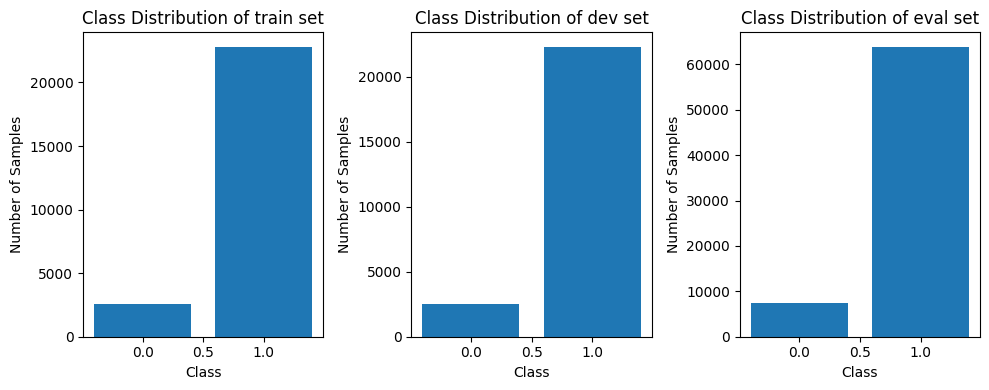

The training data is imbalanced.
The dev data is imbalanced.
The eval data is imbalanced.


In [ ]:
import matplotlib.pyplot as plt

# Calculate the number of samples in each class
train_counts = df_train['class'].value_counts()
dev_counts = df_dev['class'].value_counts()
eval_counts = df_eval['class'].value_counts()
# Create a new figure and set its size
fig = plt.figure(figsize=(10, 4))

ax1 = fig.add_subplot(131)
ax1.bar(train_counts.index, train_counts.values)
ax1.set(title='Class Distribution of train set', xlabel='Class', ylabel='Number of Samples')

ax2 = fig.add_subplot(132)
ax2.bar(dev_counts.index, dev_counts.values)
ax2.set(title='Class Distribution of dev set', xlabel='Class', ylabel='Number of Samples')

ax3 = fig.add_subplot(133)
ax3.bar(eval_counts.index, eval_counts.values)
ax3.set(title='Class Distribution of eval set', xlabel='Class', ylabel='Number of Samples')

# Adjust the layout and show the plot
plt.tight_layout()
plt.show()

# Check if the data is imbalanced
if len(train_counts.unique()) == 1:
    print("The training data is balanced.")
else:
    print("The training data is imbalanced.")
if len(dev_counts.unique()) == 1:
    print("The dev data is balanced.")
else:
    print("The dev data is imbalanced.")
if len(eval_counts.unique()) == 1:
    print("The eval data is balanced.")
else:
    print("The eval data is imbalanced.")

In [ ]:
from sklearn.utils import resample

# Calculate the number of samples in each class
class_counts = df_train['class'].value_counts()

# Determine the minority and majority class
minority_class = class_counts.idxmin()
majority_class = class_counts.idxmax()

# Upsample the minority class to match the number of samples in the majority class
minority_samples = df_train[df_train['class'] == minority_class]
upsampled_minority = resample(minority_samples, replace=True, n_samples=class_counts[majority_class], random_state=SEED)

# Combine the upsampled minority class with the majority class
df_train = pd.concat([df_train[df_train['class'] == majority_class], upsampled_minority])

# Shuffle the combined dataset
df_train = df_train.sample(frac=1, random_state=SEED)

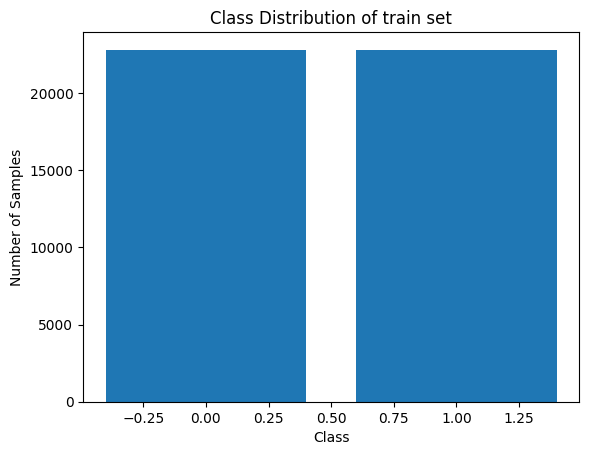

The training data is balanced.


In [ ]:
train_counts = df_train['class'].value_counts()
plt.bar(train_counts.index, train_counts.values)
plt.title('Class Distribution of train set')
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.show()
if len(train_counts.unique()) == 1:
    print("The training data is balanced.")
else:
    print("The training data is imbalanced.")

In [ ]:
# for dev and eval, let's simplify the task and use smaller amount of data, but balanced to better understand metrics
# we need this functions, because it removes unuploaded data from our dataframes
def balanced_split(df):
    k = min(len(df[df['class']==0]), len(df[df['class']==1]))
    print(k)
    df_bf = df[df['class']==0].sample(frac=1, random_state=SEED).iloc[0:k]
    df_spoof = df[df['class']==1].sample(frac=1, random_state=SEED).iloc[0:k]

    df_bf = df_bf.append([df_spoof], ignore_index=True)
    df_bf = df_bf.reset_index(drop=True)
    return df_bf

df_eval = balanced_split(df_eval)
df_dev = balanced_split(df_dev)

7355
2548


<ipython-input-9-295d12be0fb0>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_bf = df_bf.append([df_spoof], ignore_index=True)


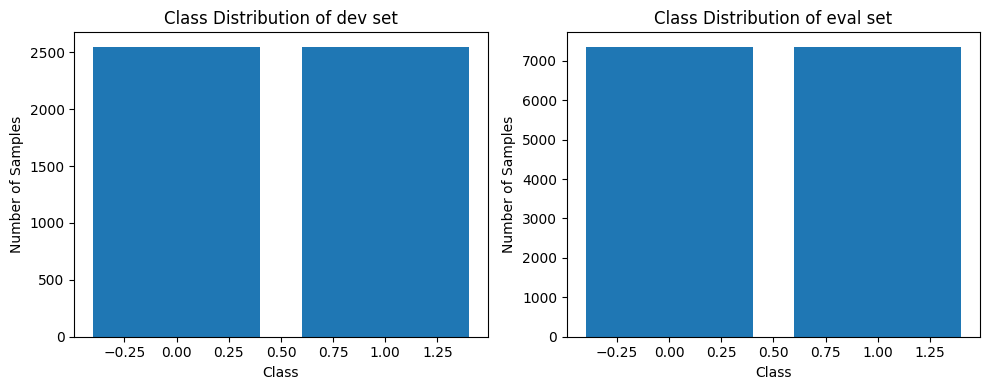

The dev data is balanced.
The eval data is balanced.


In [ ]:
import matplotlib.pyplot as plt

# Calculate the number of samples in each class
dev_counts = df_dev['class'].value_counts()
eval_counts = df_eval['class'].value_counts()
# Create a new figure and set its size
fig = plt.figure(figsize=(10, 4))

ax1 = fig.add_subplot(121)
ax1.bar(dev_counts.index, dev_counts.values)
ax1.set(title='Class Distribution of dev set', xlabel='Class', ylabel='Number of Samples')

ax2 = fig.add_subplot(122)
ax2.bar(eval_counts.index, eval_counts.values)
ax2.set(title='Class Distribution of eval set', xlabel='Class', ylabel='Number of Samples')

# Adjust the layout and show the plot
plt.tight_layout()
plt.show()

# Check if the data is imbalanced
if len(dev_counts.unique()) == 1:
    print("The dev data is balanced.")
else:
    print("The dev data is imbalanced.")
if len(eval_counts.unique()) == 1:
    print("The eval data is balanced.")
else:
    print("The eval data is imbalanced.")

In [ ]:
# for audio manipulations we advise you to use torchaudio or librosa
x, sr = torchaudio.load(df_eval["audio_path"].iloc[0])

In [ ]:
ipd.display(ipd.Audio(x, rate=sr))

**Task 1.2. (1 point)** Display several spoof and bona-fide audios. Can you hear the difference?

In [ ]:
### Your code is here
# Select several spoof and bona-fide audios for display
spoof_audios = df_train[df_train['class'] == 1]['audio_path'].iloc[0:3]
bonafide_audios = df_train[df_train['class'] == 0]['audio_path'].iloc[0:3]

# Display the spoof audios
for audio_path in spoof_audios:
    x, sr = torchaudio.load(audio_path)
    print(f'Spoof audio: {audio_path}')
    ipd.display(ipd.Audio(x, rate=sr))
    
# Display the bona-fide audios
for audio_path in bonafide_audios:
    x, sr = torchaudio.load(audio_path)
    print(f'Bona-fide audio: {audio_path}')
    ipd.display(ipd.Audio(x, rate=sr))

Spoof audio: /content/drive/MyDrive/MSc/DL/for_collab/train_flac/LA_T_9719101.flac


Spoof audio: /content/drive/MyDrive/MSc/DL/for_collab/train_flac/LA_T_9153052.flac


Spoof audio: /content/drive/MyDrive/MSc/DL/for_collab/train_flac/LA_T_8703557.flac


Bona-fide audio: /content/drive/MyDrive/MSc/DL/for_collab/train_flac/LA_T_6442486.flac


Bona-fide audio: /content/drive/MyDrive/MSc/DL/for_collab/train_flac/LA_T_8057044.flac


Bona-fide audio: /content/drive/MyDrive/MSc/DL/for_collab/train_flac/LA_T_7708952.flac


I can hear the difference between spoof and bona-fide audios. The spoof audios have a break in each word, they are not fluent and unnatural.

### Custom dataset and Model

You can find inspiration and hints in 
- https://pytorch.org/audio/stable/tutorials/audio_feature_extractions_tutorial.html
- https://pytorch.org/tutorials/beginner/finetuning_torchvision_models_tutorial.html
- https://pytorch.org/tutorials/beginner/fgsm_tutorial.html
- https://pytorch.org/tutorials/beginner/data_loading_tutorial.html
- https://pypi.org/project/audiomentations/ 
- https://pytorch.org/audio/stable/tutorials/audio_data_augmentation_tutorial.html
- and any other blogposts about spectrograms

**Task 2.1 (5 points)** We can work with audios as with images, transforming into spectrograms. Here your task is to implement simple model, which receives raw wav (amplitudes, but probably already preprocced in dataset), transforms it into mel-spectrogram, changes amplitude to DB scale (if you want) and then procceses through the layers. You are free to use ready pre-trained backbones, e.g. from `torchvision.models` and fine-tune them. However, if you want to practise more, create something on your own. Large models with `requires_grad=True` for all parameters will probably result in problems on training in colab. 

In [ ]:
from typing import Optional

class WavResNet(nn.Module):
    def __init__(self, classes=None, resample=16000, n_mels=80, melspec_config=None):
        super().__init__()
        self.fbank = torchaudio.transforms.MelSpectrogram(sample_rate=resample, n_mels=n_mels, **melspec_config)
        self.to_db = torchaudio.transforms.AmplitudeToDB()
        self.logsoftmax = nn.LogSoftmax(dim=1)
        model = torch.hub.load('pytorch/vision:v0.9.0', 'resnet18', weights='ResNet18_Weights.DEFAULT')
        model.conv1 = nn.Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
        num_ftrs = model.fc.in_features
        model.fc = nn.Linear(num_ftrs, classes)
        self.network = model
    
    def forward(self, x, wav_lens: Optional[torch.Tensor]=None):
        x = self.fbank(x)
        x = self.to_db(x)
        x = x.unsqueeze(1)
        out = self.network(x)
        out = self.logsoftmax(out)
        return out

In [ ]:
class ResNetBlock(nn.Module):
    def __init__(self, in_depth, depth, first=False):
        super(ResNetBlock, self).__init__()
        self.first = first
        self.conv1 = nn.Conv2d(in_depth, depth, kernel_size=3, stride=1, padding=1)
        self.bn1 = nn.BatchNorm2d(depth)
        self.lrelu = nn.LeakyReLU(0.01)
        self.dropout = nn.Dropout(0.5)
        self.conv2 = nn.Conv2d(depth, depth, kernel_size=3, stride=3, padding=1)
        self.conv11 = nn.Conv2d(in_depth, depth, kernel_size=3, stride=3, padding=1)
        if not self.first :
            self.pre_bn = nn.BatchNorm2d(in_depth)

    def forward(self, x):
        prev = x
        prev_mp =  self.conv11(x)
        if not self.first:
            out = self.pre_bn(x)
            out = self.lrelu(out)
        else:
            out = x
        out = self.conv1(x)
        out = self.bn1(out)
        out = self.lrelu(out)
        out = self.dropout(out)
        out = self.conv2(out)
        out = out + prev_mp
        return out

In [ ]:
class CQCCModel(nn.Module):
    def __init__(self):
        super(CQCCModel, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)
        self.block1 = ResNetBlock(32, 32, True)
        self.mp = nn.MaxPool2d(3, stride=3, padding=1)
        self.block2 = ResNetBlock(32, 32, False)
        self.block3 = ResNetBlock(32, 32, False)
        self.block4 = ResNetBlock(32, 32, False)
        self.block5 = ResNetBlock(32, 32, False)
        self.block6 = ResNetBlock(32, 32, False)
        self.lrelu = nn.LeakyReLU(0.01)
        self.bn = nn.BatchNorm2d(32)
        self.dropout = nn.Dropout(0.5)
        self.logsoftmax = nn.LogSoftmax(dim=1)
        self.fc1 = nn.Linear(64, 128)
        self.fc2 = nn.Linear(128, 2)

    def forward(self, x):
        batch_size = x.size(0)
        x = x.unsqueeze(dim=1)
        out = self.conv1(x)
        out = self.block1(out)
        out = self.block2(out)
        out = self.mp(out)
        out = self.block3(out)
        out = self.mp(out)
        out = self.block4(out)
        out = self.mp(out)
        out = self.block5(out)
        out = self.mp(out)
        out = self.block6(out)
        out = self.bn(out)
        out = self.lrelu(out)
        out = self.mp(out)
        out = out.view(batch_size, -1)
        out = self.dropout(out)
        out = self.fc1(out)
        out = self.lrelu(out)
        out = self.fc2(out)
        out = self.logsoftmax(out)
        return out

**Task 2.2 (1 point)**
In your opinion, which approach is better for binary classification: 
- Model's last layer output has shape 1, train with BCE-like loss.
- Model's last layer output has shape 2, train with cross-entropy like loss. 

**Task 2.3 (3 points)** Create custom dataset, which recieves ```df``` and returns preprocessed audio.

**Task 2.4 (1 point)** Should we use augmentations? If yes, which ones? 

**Task 2.2:** Both approaches can work for binary classification, but using a model's last layer output with shape 1 and training with a BCE-like loss is the more frequent method. The BCE-like loss was developed expressly for binary classification issues, and the output of the last layer may be understood as the probability of the positive class. In contrast, for multi-class classification tasks, a cross-entropy loss with two outputs might be more appropriate.


**Task 2.3**

In [ ]:
class DatasetWav(Dataset):

    def __init__(self, data_frame, padding_sec=4, default_sr=16000, transform=None):
        self.df = data_frame
        self.padding_sec = padding_sec
        self.default_sr = default_sr
        self.transform = transform
        self.labels = self.df['class'].tolist()
        self.paths = self.df['audio_path'].tolist()
        self.vad = torchaudio.transforms.Vad(sample_rate=default_sr)

    def __len__(self):
        return len(self.df)

    def __getitem__(self, id):
        label = self.labels[id]
        path = self.paths[id]
        waveform, sr = torchaudio.load(path, normalize=True)
        # transform waveform from stereo to mono channel 
        waveform = torch.mean(waveform, dim=0, keepdim=True)
        resample_transform = torchaudio.transforms.Resample(orig_freq=sr, new_freq=self.default_sr)
        waveform = resample_transform(waveform)
        waveform = self.vad(waveform)

        if len(waveform) < self.padding_sec * self.default_sr:
            padding = torch.zeros((1, self.padding_sec * self.default_sr - len(waveform)))
            waveform = torch.cat((waveform, padding), dim=1)
 
        else:
            waveform = waveform[:, :self.padding_sec * self.default_sr]

        if self.transform:
            waveform = self.transform(waveform)

        return waveform, label

In [ ]:
# check that works
batch_size = None

train_dataset_wavs = DatasetWav(df_train) #.iloc[0:200]
train_dataloader_wavs = DataLoader(train_dataset_wavs, batch_size=batch_size, shuffle=True, num_workers=8)
x, y = next(iter(train_dataloader_wavs))
# Define the default mel spectrogram configuration
melspec_config = {
    'n_fft': 400, 
    'hop_length': 160, 
    'win_length': 400,
    'center': True, 
    'pad_mode': 'reflect',
    'power': 2.0, 
    'norm': 'slaney',
    'mel_scale': 'htk',
    'f_min': 0.0,
    'f_max': None
}

model = WavResNet(classes=10, resample=16000, n_mels=80, melspec_config=melspec_config)
model(x)

Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.9.0


tensor([[-2.2198, -1.5786, -2.7604, -3.2226, -2.6227, -2.0042, -2.6163, -2.8889,
         -1.9634, -2.2487]], grad_fn=<LogSoftmaxBackward0>)

**Task 2.4** For problems dealing with human speech, we can use MFCC (Mel Frequency Cepstral Coefficients) to tune the Spectrogram. These essentially take Mel Spectrograms and apply a couple of further processing steps. This selects a compressed representation of the frequency bands from the Mel Spectrogram that correspond to the most common frequencies at which humans speak.

### Train and Test functions
**Task 3.0 (1 point)** What is the difference between `model.train()` and `model.eval()`? Does `model.eval()` mode take gradient statisitcs into account?

**Task 3.1 (5 points)** Implement train and test functions, which iterate over all batches. Do logging of loss, accuracy on each batch and after every epoch. Check equal error rate EER, explain, what is it.

**Task 3.0:** model.train() is used during training to update the model's parameters, while model.eval() is used during evaluation to generate consistent outputs. In training mode, the model computes gradients and updates its parameters using backpropagation. In evaluation mode, the model does not take gradient statistics into account. Instead, it disables certain layers, such as dropout and batch normalization layers, but calculates the full structure of the model.

**Task 3.1** The equal error rate (EER) refers to that point in a DET (Detection Error Tradeoff) curve where the FAR (False Acceptance rate) equals the FRR (False Rejection Rate). In other words, it is the rate at which the system incorrectly accepts an imposter and incorrectly rejects a genuine user. In general, the lower the equal error rate value, the higher the accuracy of the biometric system.

In [ ]:
def calculate_eer(y, y_score):
  fpr, tpr, thresholds = roc_curve(y, y_score, pos_label=1)
  eer = brentq(lambda x : 1. - x - interp1d(fpr, tpr)(x), 0., 1.)
  thresh = interp1d(fpr, thresholds)(eer)
  return eer, thresh

In [ ]:
def train(model, dataloaders, criterion, optimizer, num_epochs=3, scheduler=None, savename=None, 
          print_counter=10, decay_factor=10, device=torch.device("cuda")):
    train_loss_history = []
    train_acc_history = []
    val_loss_history = []
    val_acc_history = []
    val_eer_history = []

    for epoch in range(num_epochs):
        train_loss = 0.0
        train_corrects = 0
        train_total = 0
        val_loss = 0.0
        val_corrects = 0
        val_total = 0
        y_true = []
        y_pred = []

        # Training phase
        model.train()
        for i, (inputs, labels) in enumerate(dataloaders['train']):
            inputs = inputs.to(device)
            labels = labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            train_loss += loss.item() * inputs.size(0)
            train_corrects += torch.sum(preds == labels.data)
            train_total += inputs.size(0)

            # Log training loss and accuracy
            wandb.log({"Batch training loss": train_loss/train_total}, step=i+len(dataloaders['train'])*epoch)
            wandb.log({"Batch training accuracy": train_corrects.double()/train_total}, step=i+len(dataloaders['train'])*epoch)
            if i % print_counter == 0:
                print('Epoch [{}/{}], Batch [{}/{}], Train Loss: {:.4f}, Train Acc: {:.4f}'.format(
                    epoch+1, num_epochs, i+1, len(dataloaders['train']), train_loss/train_total, train_corrects.double()/train_total))
                
        # Calculate training loss and accuracy for the epoch
        train_loss = train_loss / train_total
        train_acc = train_corrects.double() / train_total
        train_loss_history.append(train_loss)
        train_acc_history.append(train_acc)
        print('Epoch [{}/{}], Train Loss: {:.4f}, Train Acc: {:.4f}'.format(epoch+1, num_epochs, train_loss, train_acc))
        # Log loss to wandb
        wandb.log({"Epoch training loss": train_loss}, step=epoch)
        wandb.log({"Epoch training accuracy": train_acc}, step=epoch)

        # Validation phase
        model.eval()
        with torch.no_grad():
            for inputs, labels in dataloaders['val']:
                inputs = inputs.to(device)
                labels = labels.to(device)
                outputs = model(inputs)
                _, preds = torch.max(outputs, 1)
                loss = criterion(outputs, labels)

                val_loss += loss.item() * inputs.size(0)
                val_corrects += torch.sum(preds == labels.data)
                val_total += inputs.size(0)

                # Collect ground truth and predicted labels for EER calculation
                y_true.extend(labels.cpu().numpy())
                y_pred.extend(outputs[:, 1].detach().cpu().numpy())

            # Log validation loss and accuracy
            val_loss = val_loss / val_total
            val_acc = val_corrects.double() / val_total
            val_loss_history.append(val_loss)
            val_acc_history.append(val_acc)
            wandb.log({"Epoch val loss": val_loss}, step=epoch)
            wandb.log({"Epoch val accuracy": val_acc}, step=epoch)
            print('Epoch [{}/{}], Val Loss: {:.4f}, Val Acc: {:.4f}'.format(epoch+1, num_epochs, val_loss, val_acc))

            # Calculate EER
            eer, thresh = calculate_eer(y_true, y_pred)
            print('Epoch [{}/{}], Val EER: {:.4f}'.format(epoch+1, num_epochs, eer))

        # Learning rate scheduling
        if scheduler is not None:
            scheduler.step(val_loss)

        # Save the model
        if savename is not None:
            torch.save(model.state_dict(), savename)

    return model, val_acc_history

In [ ]:
def test(model, test_dataloader, criterion=None, device=None, savename=None):
    model.eval()
    total_loss = 0.0
    total_correct = 0
    total_samples = 0
    y_true = []
    y_scores = []
    
    with torch.no_grad():
        for batch_id, (data, target) in enumerate(test_dataloader):
            data, target = data.to(device), target.to(device)
            output = model(data)
            loss = criterion(output, target)
            total_loss += loss.item() * data.size(0)
            pred = output.argmax(dim=1, keepdim=True)
            total_correct += pred.eq(target.view_as(pred)).sum().item()
            total_samples += data.size(0)
            y_true.extend(target.cpu().numpy())
            y_scores.extend(torch.softmax(output, dim=1).cpu().numpy()[:, 1])
            
            if batch_id % 10 == 0:
                print('Test Batch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                    batch_id, batch_id * len(data), len(test_dataloader.dataset),
                    100. * batch_id / len(test_dataloader), loss.item()))
                
        total_loss /= len(test_dataloader.dataset)
        accuracy = 100. * total_correct / len(test_dataloader.dataset)
        print('Test set: Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)'.format(
            total_loss, total_correct, len(test_dataloader.dataset), accuracy))
        
        eer, thresh = calculate_eer(y_true, y_scores)
        print('Equal Error Rate (EER): {:.2f}%'.format(eer*100))
        
        if savename is not None:
            with open(savename, 'a') as f:
                f.write('Test set: Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
                    total_loss, total_correct, len(test_dataloader.dataset), accuracy))
                f.write('Equal Error Rate (EER): {:.2f}%\n'.format(eer*100))
                
    return y_true, y_scores

### Main loop 

**Task 4.1 (3 points)** What loss will you choose and why? What it should receive for input (logits, probs)? Explain your answer.
Consider also:
- https://medium.com/swlh/focal-loss-what-why-and-how-df6735f26616
- https://libauc.org/



I would choose the Negative Log-likelihood loss (NLLLoss) with class weights for my voice-anti-spoofing algorithm. Since the output of the network is in LogSoftmax form, the input to the loss function should also be in logarithmic probability form. Therefore, I would pass the logarithmic probability (logits) to the NLLLoss function as input.

**Task 4.2 (5 points)** Implement main function, which receives yaml or json config (or path to it) and train and test the model, save model checkpoints, and model's test predictions. At least, you should obain results better than random. It is good, if accuracy on test dataset is >= 0.75.

In [ ]:
import json
import yaml

def main(config_file):
    # Load config file
    if config_file.endswith(".yaml"):
        with open(config_file, 'r') as f:
            config = yaml.safe_load(f)
    elif config_file.endswith(".json"):
        with open(config_file, 'r') as f:
            config = json.load(f)
    else:
        raise ValueError("Invalid config file format.")

    # Set random seed for reproducibility
    torch.manual_seed(config["random_seed"])

    lr = config['lr'] 
    epochs = config['epochs']
    batch_size = config['batch_size'] 

    wandb.init(project="voice-anti-spoofing", name = "test_run", tags = ["ResNet"])
    wandb.config = {
      "learning_rate": lr,
      "epochs": epochs,
      "batch_size": batch_size
    }

    # debug firstly on small subpart of dataset
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    train_dataset_wavs = DatasetWav(df_train) #.iloc[0:200]
    train_dataloader_wavs = DataLoader(train_dataset_wavs, batch_size=batch_size, shuffle=True, num_workers=2)
    val_dataset_wavs = DatasetWav(df_dev)
    val_dataloader_wavs = DataLoader(val_dataset_wavs, batch_size=batch_size, shuffle=True, num_workers=2)
    test_dataset_wavs = DatasetWav(df_eval)
    test_dataloader_wavs = DataLoader(test_dataset_wavs, batch_size=batch_size, shuffle=True, num_workers=2)
    dataloaders = {"train": train_dataloader_wavs, "val": val_dataloader_wavs}
    
    melspec_config = {
    'n_fft': 400, 
    'hop_length': 160, 
    'win_length': 400,
    'center': True, 
    'pad_mode': 'reflect',
    'power': 2.0, 
    'norm': 'slaney',
    'mel_scale': 'htk',
    'f_min': 0.0,
    'f_max': None}
    
    classes = 2                                             
    model = WavResNet(classes=classes, resample=16000, n_mels=80, melspec_config=melspec_config)  
    #model = CQCCModel()                                                                           
    model = model.to(device)
    # freeze layers except the last one if you want
    for param in model.parameters():
       param.requires_grad = False
    #model.network.fc.requires_grad_(True)
                                                                                           
    optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=0.001)
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, factor=0.1, patience=3)
    sc = torch.FloatTensor([1.0, 9.0]).to(device) 
    criterion = nn.NLLLoss(weight=sc)
    for_ckpts = "."
    os.makedirs(for_ckpts, exist_ok=True)
    
    model, val_acc_history = train(model, dataloaders, criterion, optimizer, num_epochs=epochs, device=device, savename = 'train.log')
    
    y, probs = test(model, test_dataloader_wavs, criterion=criterion, device=device, savename='test.log')
    # Finish wandb run
    wandb.finish()
    return y, probs

In [ ]:
config_file = 'config.json'
config = {
    'project': 'voice_spoofing',
    'name': 'test_run',
    'lr': 0.0001,
    'batch_size': 32,
    'epochs': 1,
    'device': 'cuda',
    'random_seed': 42
}
with open(config_file, 'w') as f:
    json.dump(config, f)

In [ ]:
y, probs = main(config_file)

Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.9.0


RuntimeError: ignored

Training might require a long time. So, you can try to use subpart of the dataset to receive rather good results. Also, you don't have to train for many epochs, 1 or even a half of epoch might be enough. Also consider to make some speedups in the model and dataset.

Colab also might work unstable with lots of data. If this happens, think how to deal with it, e.g. restart the kernel and/or remove the majority of data from Drive and try to bugfix firstly, then do train and test separately. 



**Task 4.3 (5 points)** Analyze the results. Play some audios with wrong predictions. Plot prediction distributions vs class. Is it possible to find better threshold?

**Task 4.4 (5 points)** Discuss the results and your approaches + hyperparameters. If you can, run some experiments with different parameters.

 Write your ideas, what else you can try to improve the results in the future.

**Task 4.5 (3 points)** Provide link to wandb project, or link to report. Upload best model's weights to Drive and provide a link with access right.


In [ ]:
# Your solution is here

**Bonus task. (50 points)** 

So far, we didn't care about speaker_id and verification. Take verification model from whatever you want and create counter measure subnetwork, as described in this [article](https://sasv-challenge.github.io/pdfs/2022_descriptions/IDVoice.pdf). Train the model, as described there. ASVspoof also provides Enrollment(anchor) recordings. Try to make blending, to obtain better metrics for counter measures.

These links might be helpful:
- https://github.com/archinetai/surgeon-pytorch
- https://www.kaggle.com/code/peter0749/additive-margin-softmax-loss-with-visualization

## Problem 3. (30 pts)

### Task 1 (10 pts)

For FCNN (Fully connected Neural Networks)
\begin{equation}
f(x)=f_k\left(f_{k-1}\left(\ldots\left(f_0(x)\right)\right),\right.
\end{equation}
assume the nonlinearity function $\sigma$ is ReLU and loss function $L$ is squared error loss function.
Prove that the deep learning model is not unique for any datasets, i.e. the optimization problem 
\begin{equation}
\min_\theta \ g(\theta)=\frac{1}{N} \sum_{i=1}^N L\left(y_i, \hat{y}_i\right), \text{where} \ \ \hat{y}_i=f\left(x_i, \theta\right),
\end{equation} 
dose not have an unique global minimizer $\theta$.

#### Proof

To prove that the optimization problem does not have a unique global minimizer, we will show that there exist two different sets of parameters that achieve the same loss value.

Consider two fully connected neural networks with the same architecture, i.e., same number of layers, same number of nodes per layer, and same ReLU activation function. Let the parameters of the first network be denoted as $\theta$ and the parameters of the second network be denoted as $\theta'$. ($\|\theta-\theta'\|_{\infty} \leq \epsilon$, where $|\cdot|_{\infty}$ is the infinite norm of a matrix.)

Let the inputs to both networks be the same, i.e., $x_i$ for all $i=1,\ldots,N$. The outputs of both networks for all inputs are $\hat{y}_i=f(x_i,\theta)$ and $\hat{y}_i'=f(x_i,\theta')$ for all $i=1,\ldots,N$. We will show that $\|f(x, \theta)-f(x, \theta')\|_{\infty} \leq \delta$, where $\delta$ is a small positive number that depends on $\epsilon$.

By the Lipschitz continuity of the ReLU activation function, we have that for a single neuron of the network with output $z$, $$|f_l(z, w_1)- f_l(z, w_2)|\le |z(w_1-w_2)|$$ where $f_l(z, w)=\sigma_l\left(\sigma_{l-1}\left(\ldots\left(\sigma_0(x)\right)\right)\right);$ $f_l(z, w_1)$ is the output of the neuron with weight matrix $w_1$ and $f_l(z, w_2)$ is the output of the same neuron with weight matrix $w_2$. We can bound this by $$|f_l(z, w_1)- f_l(z, w_2)|_{\infty} \leq \delta_l$$ where $\delta_l = (\max z -\min z)\times n\times \epsilon $ depends on the maximum and minimum values of $z$ and the number of input connections to the neuron.

For each layer of the network, we can compute a bound $\delta_l$ for the difference in outputs between the same layer in the two networks. Then, the final bound for the difference between the two networks is the sum of all these layer-wise bounds.

Since all the layer-wise bounds $\delta_l$ are bounded, their sum is also bounded. Therefore, there exists a $\delta$ such that $\|\hat{y}' - \hat{y}\|_{\infty}=\|f(x, \theta)-f(x,\theta')\|_{\infty} \leq \delta$ whenever $\|\theta-\theta'\|_{\infty} \leq \epsilon$. Hence, there exists $\delta\rightarrow 0$ when $\epsilon\rightarrow 0$.

Now, let $y_i$ be the true label for the input $x_i$. We have:

$$
L(y_i,\hat{y}_i) = (y_i-\hat{y}_i)^2 = (y_i-\hat{y}_i'+ \hat{y}_i' - \hat{y}_i)^2 = (y_i-\hat{y}_i')^2 = L(y_i,\hat{y}_i').
$$

Therefore, the loss function is the same for both sets of parameters $\theta$ and $\theta'$ for all inputs, i.e., $g(\theta) = g(\theta')$. Thus, the optimization problem does not have a unique global minimizer.

### Task 2 (5 pts)

The *softmax* activation function is 
\begin{equation}
\mathrm{Softmax}(\mathbf{z})_i=\frac{e^{z_i}}{\sum_{j=1}^K e^{z_j}} \ \text { for } \  i=1, \ldots, K \text { and } \mathbf{z}=\left(z_1, \ldots, z_K\right) \in \mathbb{R}^K.
\end{equation}
Suppose $\mathbf{z} \in \mathbb{R}^K$, and $\mathbf{a} \in \mathbb{R}^K$,
Prove that for the optimization problem
\begin{equation}
\begin{aligned}
& \min_{\mathbf{a}} \ -\langle\mathbf{a}, \mathbf{z}\rangle+\langle\mathbf{a}, \log \mathbf{a}\rangle \\
& \text { s.t. } \sum_k^K \mathbf{a}_{k}=1,
\end{aligned}
\end{equation}
the minimizer is 
\begin{equation}
\mathbf{a}^*=\mathrm{Softmax}(\mathbf{z}).
\end{equation}

*Hint*: KKT optimality conditions and convexity of the problem can help you to show the required equality

####Proof
We will first write down the Lagrangian function for the optimization problem as follows:

$$
\mathcal{L}(\mathbf{a}, \lambda) = -\langle\mathbf{a}, \mathbf{z}\rangle + \langle\mathbf{a}, \log \mathbf{a}\rangle + \lambda\left(\sum_{k=1}^K a_k - 1\right)
$$

where $\lambda$ is the Lagrange multiplier. Now, we will take the partial derivative of $\mathcal{L}$ with respect to $\mathbf{a}$ and $\lambda$ and set them to zero to obtain the KKT optimality conditions.

$$
\frac{\partial \mathcal{L}}{\partial a_i} = -z_i + 1 + \log a_i + \lambda = 0 \ \ \ \text{ for } i=1,2,\ldots,K
$$

$$
\frac{\partial \mathcal{L}}{\partial \lambda} = \sum_{k=1}^K a_k - 1 = 0
$$

Solving for $\lambda$, we get:

$$
\lambda = z_i - \log a_i - 1 \ \ \ \text{ for } i=1,2,\ldots,K
$$
$$⇒ a_i = e^{-\lambda + z_i - 1} \ \ \ \text{(*)}$$
Substituting this value of $a_i$ back into the second equation, we obtain:

$$\sum_{k=1}^K a_{k}=\sum_{k=1}^Ke^{-\lambda +z_k-1}=e^{-\lambda-1}\sum_{k=1}^Ke^{z_k}=1 $$
$$ \Rightarrow \sum_{k=1}^Ke^{z_k} = e^{\lambda+1}$$
$$ \Rightarrow \lambda=\log\left(\sum_{k=1}^Ke^{z_k}\right)-1$$

Replacing this $\lambda$ to (*) we get:

$$ a_i=e^{-\log\left(\sum_{k=1}^Ke^{z_k}\right)+ z_i}=\frac{e^{z_i}}{\sum_{k=1}^Ke^{z_k}} = \mathrm{Softmax}(\mathbf{z})_i$$
Hence, the minimizer is
$$ \mathbf{a^*} = \mathrm{Softmax}(\mathbf{z})$$

### Task 3 (15 pts)

For function $f(x)=x^2, x \in \left[0, 1\right]$, 

1) prove that the neural network $\hat f(x)$ based on the following structure has the approximation error 
\begin{equation}
|f(x)-\hat f(x)|\leq \frac{1}{2^{n-1}}
\end{equation}
where $n$ is the number of layers in the nural network.

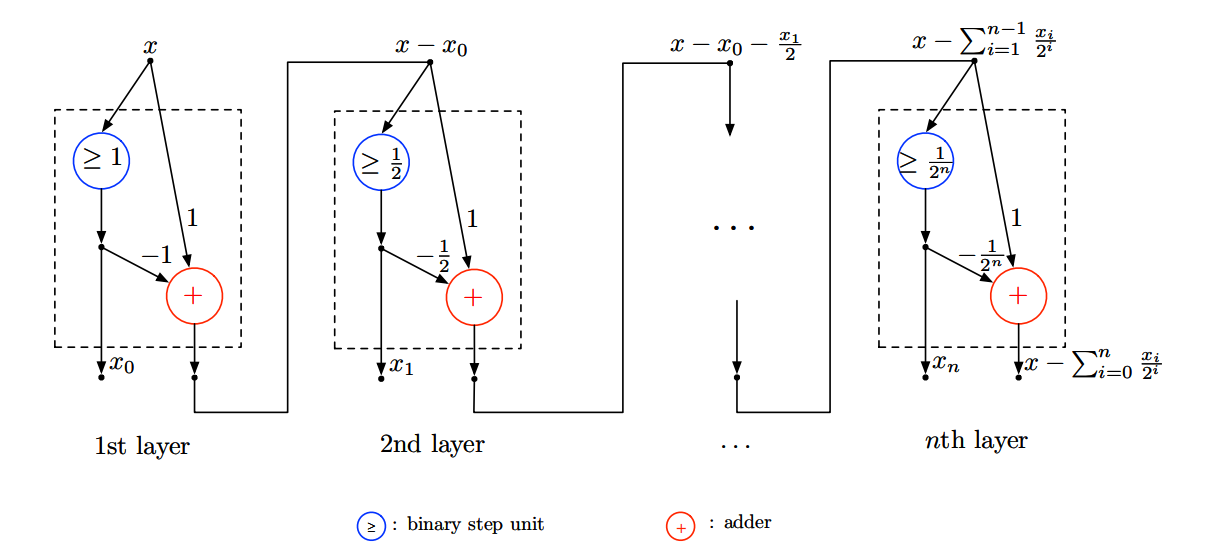

*Hint*: For each $ x \in \left[0, 1\right]$, $x$ can be denoted by its binary expansion $x=\sum_{i=0}^{n} x_i/2^i$, where $x_i \in \{ 0, 1\}$. The above structure can be used to find $x_0,\dots, x_n$. Then we can write $\hat f(x)=f\left(\sum_{i=0}^{∞} x_i/2^i\right).$

After the proof, if we want to achieve $\epsilon$ appoximation error based on the above neural network, the number of layers $n$ has to satisfy the condition $\frac{1}{2^{n-1}}\leq \epsilon$, i.e. $n\geq \log_2 \frac{1}{\epsilon}$.

2) Implement this neural network in any framework you like with different $n$ (for example $n = 3, 5, 10, 15$), and then plot the curve for absolute errors for different $n$. Compare the obtained plots with theoretical bound.


####Proof

1) For each $ x \in \left[0, 1\right]$, $x$ can be denoted by its binary expansion $$x=\sum_{i=0}^{n}\frac{x_i}{2^i}$$ 
We use $n+1$ units in the input layer to represent the binary digits $x_0, x_1, \dots, x_n$, and apply the following operations:

For each $i=0,1,\dots,n$, connect the $i$-th input unit to a hidden unit with weight $2^i$.
Connect each hidden unit to the output unit with weight $1$.
The output of the network is $$\hat f(x)=f\left(\sum_{i=0}^n \frac{x_i}{2^i}\right)$$
We can compute the approximation error as follows:

$$|f(x)-\hat f(x)|=\left|x^2-\left(\sum_{i=0}^n\frac{x_i}{2^i}\right)^2\right|=\left|\left(x-\sum_{i=0}^n\frac{x_i}{2^i}\right)\left(x+\sum_{i=0}^n\frac{x_i}{2^i}\right)\right|=\left|\left(\sum_{i=0}^{\infty}\frac{x_i}{2^i}-\sum_{i=0}^n\frac{x_i}{2^i}\right)\left(x+\sum_{i=0}^n\frac{x_i}{2^i}\right)\right|=
\left|\left(\sum_{i=n+1}^{\infty}\frac{x_i}{2^i}\right)\left(x+\sum_{i=0}^n\frac{x_i}{2^i}\right)\right| \le \bigg[ x\le 1\bigg]\le \left|\left(\sum_{i=n+1}^{\infty}\frac{1}{2^i}\right). 2\right|=\left|\frac{1/{2^{n+1}}}{1-1/2}.2\right| = \frac{1}{2^{n-1}}$$

To achieve an $ϵ$ approximation error, we want
$$\frac{1}{2^{n-1}} \le ϵ$$
which implies 
$$n \ge log_2{\frac{1}{ϵ}}+1 $$
Therefore, the number of layers $n$ required to achieve an $ϵ$ approximation error is at least $log_2{\frac{1}{ϵ}}+1 $

<ipython-input-35-32fb1d5863c7>:37: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x1 = torch.tensor(L).clone().detach()


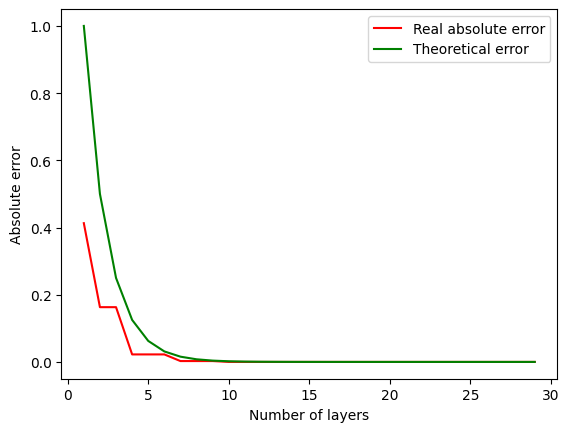

In [ ]:
n_layers = 30
x = torch.rand(1)
def f(x):
   return x**2
n_list = [i for i in range(1, n_layers, 1)]
errors = []

class Custom(nn.Module):
    def __init__(self, n):
        super(Custom, self).__init__()
        self.n = n
    
    def forward(self, x):
        return torch.where(x >= 1/2**self.n, 1, 0)
    
class create_model(nn.Module):
    def __init__(self, num_layers):
        super(create_model, self).__init__()
        self.num_layers = num_layers
        self.layers = nn.ModuleList([Custom(n) for n in range(self.num_layers)])
        
    def forward(self, x):
        x_list = []
        input = x.clone()

        for (n, layer) in enumerate(self.layers):
            out = layer(input)
            x_list.append(out)
            output = -(1/2**n)*out + input
            input = output.clone()
        return output, x_list

for num_layers in n_list:
    model = create_model(num_layers)
    output, x_list = model(x)
    L = sum([x_i/2**i for i, x_i in enumerate(x_list)])
    x1 = torch.tensor(L).clone().detach()
    error = torch.abs(f(x1) - f(x)).sum()
    errors.append(error)

bound = [1/2**(i-1) for i in range(1, n_layers, 1)]
plt.plot(n, errors,color='red', label='Real absolute error')
plt.plot(n, bound, color='green', label='Theoretical error')
plt.legend()
plt.xlabel('Number of layers')
plt.ylabel('Absolute error')

plt.show()

We can see that the maximum absolute error decreases as n increases, which is consistent with the theoretical bound. When n is small however, the real absolute errors are significantly less than the theoretical constraint, indicating that the bound is not tight. This is because the theoretical bound is a worst-case scenario and does not take into account the specific function being approximated or the properties of the neural network.